## Section 1: Import packages

The cell below imports all the necessary packages used in plotting.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import xesmf as xe
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib


## Section 2: Plotting figures
This section contains all the codes for generating the figures.

### Data:
Simulations: Simulations were branched from an existing CCSM4-PlioMIP1 simulation (Rosenbloom et al., 2013). One applied pre-industrial emission (hereafter referred as to Plio\_Pristine). One applied the pre-industrial plus 2000s emissions from Lamarque et al. (2010), hereafter referred as to Plio\_Polluted. The pre-industrial simulation is hereafter referred as to PI. 

PlioMIP anomalies are adopted from Haywood et al. (2013) for PlioMIP1 and (2020) for PlioMIP2.

Proxy data: Simulated mid-Pliocene Warm Period (mPWP, 3.3 - 3.0 Ma) annual mean temeprature change is compared to Foley and Dowsett (2019). Simulated mean annual precipitation change is compared to Salzmann et al. (2008) and Feng er al. (2022).

For more details, please read the Methods section in manuscript.

### Figures:
For details, please read figure captions in manuscript.

### Figure 1: Changes in (a) mean annual surface temperature and precipitation 

In [2]:
# Load simulated variables and compute anomalies
# used variables:
#     ts_ann: annual mean temperature in degree_C
#     pr_ann: annual mean precipitation in mm/day
# open files
f = xr.open_dataset('data/fig_01_02.nc',decode_times=False) # Load
LON=f.lon # Longitude
LAT=f.lat #Latitude

# annual mean temperature change
dts_ann = f.ts_ann
dts_ann, dts_ann_lon = add_cyclic_point(dts_ann.values, coord=LON) # used to remove the blank line along 0deg Lon. in figure

# annual mean precipitation hange
dpr_ann = f.pr_ann
dpr_ann, dpr_ann_lon = add_cyclic_point(dpr_ann.values, coord=LON) # used to remove the blank line along 0deg Lon. in figure

In [3]:
# Load proxy data

# Foley and Dowsett (2019)
prism = pd.read_csv('data/proxy/prism_sst.csv',skipinitialspace=True,header=5)
prism_sst = prism.Anom # annual mean SST anomalies in deg_C
prism_lat = prism.lat # latitude in deg_N
prism_lon = prism.lon # longitude in deg_E

# Salzmann et al. (2008)
plio_pr_recons = pd.read_csv('data/proxy/plio_recons_pr.csv',skipinitialspace=True,header=5)
plio_pr_recons_pr = plio_pr_recons.Anom/365 # annual mean precipitation anomalies in mm/year, convert the unit from mm/year to mm/day
plio_pr_recons_lat = plio_pr_recons.lat # latitude in deg_N
plio_pr_recons_lon = plio_pr_recons.lon # longitude in deg_E

# Feng et al. (2022)

feng_pr= pd.read_csv('data/proxy/mpwp_pr_sign.csv',skipinitialspace=True,header=7)
feng_pr_sign=feng_pr.index # the sign of annual mean precipitation anomalies as -1: drier, 0: no change and 1: wetter
feng_pr_lat=feng_pr.lat # latitude in deg_N
feng_pr_lon=feng_pr.lon # longitude in deg_E
feng_pr_df={'lat':feng_pr_lat,'lon':feng_pr_lon,'sign':feng_pr_sign}



/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


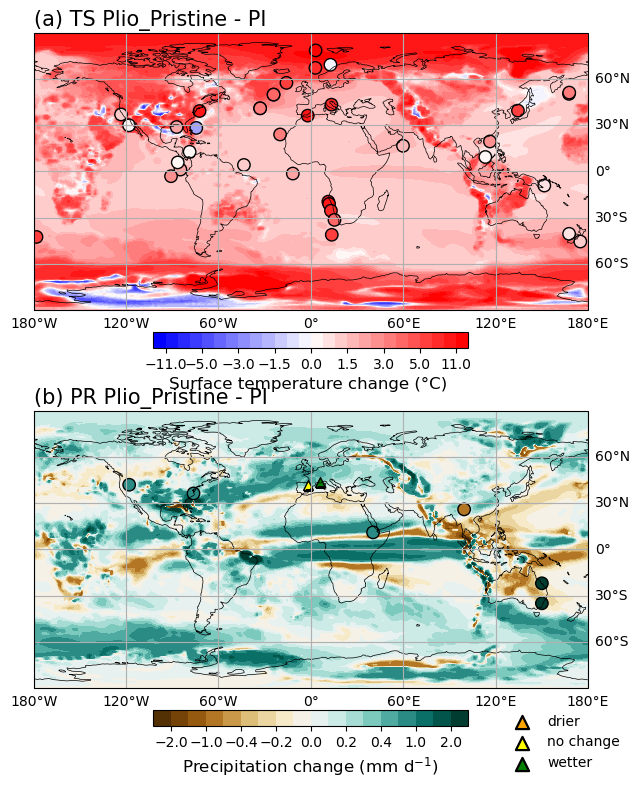

In [4]:
# Define colors
# temperature
cmap1=plt.get_cmap('bwr')
bounds1 = [-30,-11,-9,-7,-5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,5,7,9,11,30]
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
# precipitation
cmap2=plt.get_cmap('BrBG')
bounds2=[-13,-2,-1.5,-1,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,1,1.5,2,13]
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)

# Plot figure
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(10,9),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0.0, globe=None)})
ax1=axs[0]
ax2=axs[1]
# Panel a
ax1.set_title('(a) TS Plio_Pristine - PI',fontsize=15,loc='left',pad=5)
ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.gridlines()
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl1.xlabels_top = False
gl1.ylabels_left = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
fig1=ax1.contourf(dts_ann_lon,LAT,dts_ann,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
# plot Foley and Dowsett (2019)
ax1.scatter(prism_lon,prism_lat,c=prism_sst,marker='o',s=80,linewidths=1,edgecolors='k',cmap=cmap1,transform=ccrs.PlateCarree(),norm=norm1)
# add colorbar
cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in [ax1]],location='bottom',pad=0.07,shrink=0.7,fraction=0.05)
cb1=plt.colorbar(fig1, cax=cax1, **kw1,extend='both')
cb1.ax.tick_params(labelsize=10)
cb1label='Surface temperature change (%sC) ' %chr(176)
cb1.set_label(cb1label,fontsize=12)

# panel b
ax2.set_title('(b) PR Plio_Pristine - PI',fontsize=15,loc='left',pad=5)
ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.gridlines()
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl2.xlabels_top = False
gl2.ylabels_left = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
fig2=ax2.contourf(dpr_ann_lon,LAT,dpr_ann,levels=bounds2, transform=ccrs.PlateCarree(),cmap=cmap2,norm=norm2)
# plot Salzmann et al. (2008)
ax2.scatter(plio_pr_recons_lon,plio_pr_recons_lat,c=plio_pr_recons_pr,marker='o',s=80,linewidths=1,edgecolors='k',cmap=cmap2,transform=ccrs.PlateCarree(),norm=norm2)
#plot Feng et al. (2022)
for i,s in enumerate(feng_pr_df['sign']):
    if s == -1:
        ax2.scatter(feng_pr_df['lon'][i],feng_pr_df['lat'][i],marker='^',s=50,linewidths=1,edgecolors='k',color='orange')
    if s == 0:
        ax2.scatter(feng_pr_df['lon'][i],feng_pr_df['lat'][i],marker='^',s=50,linewidths=1,edgecolors='k',color='yellow')
    if s == 1:
        ax2.scatter(feng_pr_df['lon'][i],feng_pr_df['lat'][i],marker='^',s=50,linewidths=1,edgecolors='k',color='green')          
# legend the sign
ax2.scatter(200,200,marker='^',s=90,linewidths=1.6,edgecolors='k',color='orange',label='drier')
ax2.scatter(200,200,marker='^',s=90,linewidths=1.6,edgecolors='k',color='yellow',label='no change')
ax2.scatter(200,200,marker='^',s=90,linewidths=1.6,edgecolors='k',color='green',label='wetter')
ax2.legend(bbox_to_anchor=(1.08,-0.05),loc='upper right',facecolor='white',edgecolor='none')
# add colorbar
cax2,kw2 = matplotlib.colorbar.make_axes([ax for ax in [ax2]],location='bottom',pad=0.07,shrink=0.7,fraction=0.05)
cb2=plt.colorbar(fig2, cax=cax2, **kw2,extend='both')
cb2.ax.tick_params(labelsize=10)
cb2label='Precipitation change (mm d$^{-1}$) ' 
cb2.set_label(cb2label,fontsize=12)


### Figure 2: Zonal averaged mean annual (a) surface temperature in deg_C and (b) presipitaiton in mm/day

In [7]:
# Load simulated variables and compute anomalies
# used variables:
#     ts_ann: annual mean temperature in degree_C
#     pr_ann: annual mean precipitation in mm/day
# open files
f = xr.open_dataset('data/fig_01_02.nc',decode_times=False) # Load 
LON=f.lon # Longitude
LAT=f.lat #Latitude
# annual mean temperature change

dts_ann = f.ts_ann
dts_ann_ave = np.average(dts_ann,axis=1) # compute zonal means
# annual mean precipitation change
dpr_ann = f.pr_ann
dpr_ann_ave = np.average(dpr_ann,axis=1) # compute zonal means


In [8]:
# PlioMIP 2 annual mean temperature and precipitation change published in Haywood et al. (2020)
# temperature
fpliomip2_t = xr.open_dataset('data/pliomip/pliomip2_tas.nc',decode_times=False)
pliomip2_tas = fpliomip2_t.nearsurfacetemperaturemean_anomaly
pliomip2_tas_std = fpliomip2_t.nearsurfacetemperatureanomaly_multimodel_stddev
pliomip2_tas_lat = fpliomip2_t.latitude
pliomip2_tas_ave = np.average(pliomip2_tas,axis=1) # compute zonal means
pliomip2_tas_std_ave = np.average(pliomip2_tas_std,axis=1) # compute zonal means
#precipitation
fpliomip2_p = xr.open_dataset('data/pliomip/pliomip2_pr.nc',decode_times=False)
pliomip2_pr = fpliomip2_p.totalprecipitationmean_anomaly
pliomip2_pr_std = fpliomip2_p.totalprecipitationanomaly_multimodel_stddev
pliomip2_pr_lat = fpliomip2_p.latitude
pliomip2_pr_ave = np.average(pliomip2_pr,axis=1) # compute zonal means
pliomip2_pr_std_ave = np.average(pliomip2_pr_std,axis=1) # compute zonal means

# PlioMIP 1 anomalies published in Haywood et al. (2013)
fpliomip1 = xr.open_dataset('data/pliomip/pliomip1.nc',decode_times=False)
pliomip1_lat = fpliomip1.latitude
# temperature
pliomip1_tas = fpliomip1['PlioMIP_SAT'][0]
pliomip1_tas_std = fpliomip1['PlioMIP_SAT_std'][0]
pliomip1_tas_ave = np.average(pliomip1_tas,axis=1) # compute zonal means
pliomip1_tas_std_ave = np.average(pliomip1_tas_std,axis=1) # compute zonal means
# precipitation
pliomip1_pr = fpliomip1['PlioMIP_precip'][0]
pliomip1_pr_std = fpliomip1['PlioMIP_precip_std'][0]
pliomip1_pr_ave = np.average(pliomip1_pr,axis=1) # compute zonal means
pliomip1_pr_std_ave = np.average(pliomip1_pr_std,axis=1) # compute zonal means




In [12]:
# site level anomalies
# temperature
dfsitet = pd.read_csv('data/pliomip/mpwp_ts_sites.csv',skipinitialspace=True,header=15)
d_tas_lat = dfsitet['lat'] # latitude
d_tas_expt = dfsitet['expt'] # this study
d_tas_anom = dfsitet['anom'] # proxy from Foley and Dowsett (2019)
d_tas_anom_std = dfsitet['std'] # proxy std
dpliomip1_tas = dfsitet['dt1'] # PlioMIP1 MMM
dpliomip1_tas_std = dfsitet['dt1std'] # PlioMIP1 std
dpliomip2_tas = dfsitet['dt2'] # PlioMIP2 MMM
dpliomip2_tas_std = dfsitet['dt2std'] # PlioMIP2 std


# precipitation
dfsitep = pd.read_csv('data/pliomip/mpwp_pr_sites.csv',skipinitialspace=True,header=15)
d_pr_lat = dfsitep['lat'] # latitude
d_pr_anom = dfsitep['anom'] # proxy from Salzmann et al. (2008)
d_pr_expt = dfsitep['expt'] # this study
dpliomip1_pr = dfsitep['dp1'] # PlioMIP1 MMM
dpliomip1_pr_std = dfsitep['dp1std'] # PlioMIP1 std
dpliomip2_pr = dfsitep['dp2'] # PlioMIP2 MMM
dpliomip2_pr_std = dfsitep['dp2std'] # PlioMIP2 std


Text(0.5, 0, 'Precipitation change (mm d$^{-1}$) ')

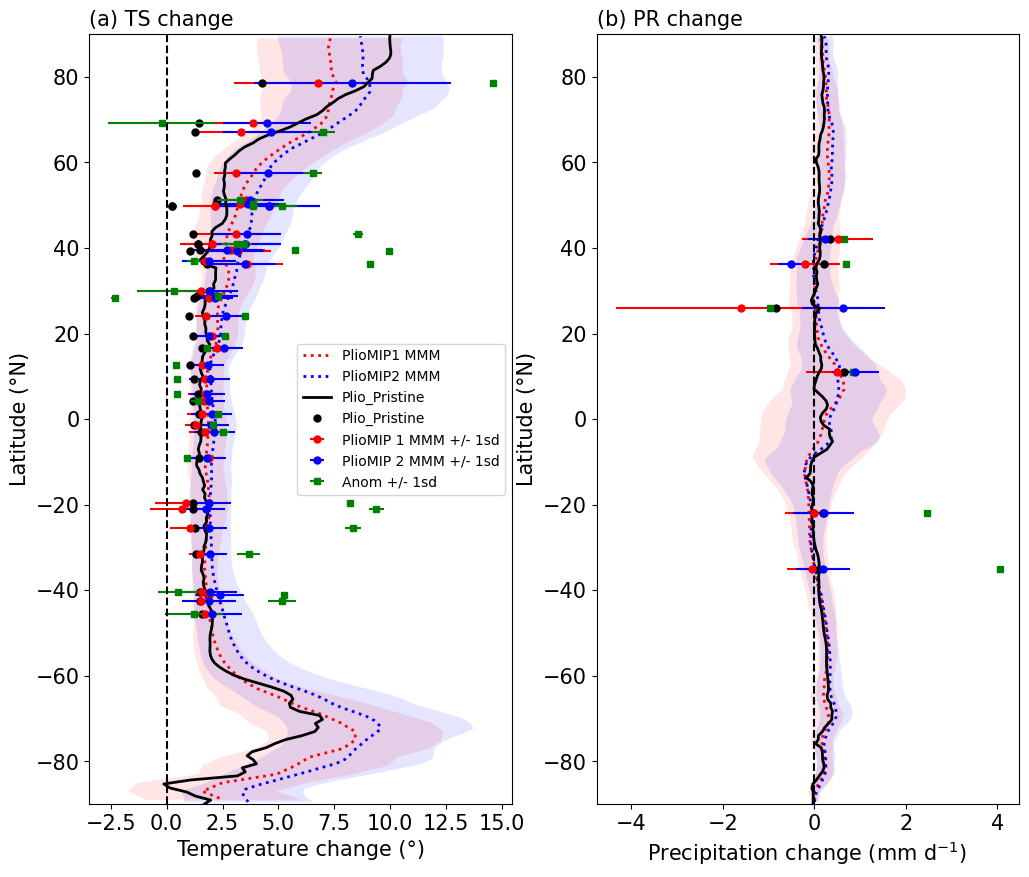

In [14]:
# Plot Figure 2
plt.figure(figsize = (12,10))
# panel a
plt.subplot(121)
plt.ylim([-90,90])
plt.title('(a) TS change',loc='left',fontsize=15)
# PlioMIP1
# PlioMIP1 means
plt.plot(pliomip1_tas_ave,pliomip1_lat,color='r',label='PlioMIP1 MMM',lw=2, ls='dotted')
# PlioMIP1 std
plt.fill_betweenx(pliomip1_lat,pliomip1_tas_ave+pliomip1_tas_std_ave ,pliomip1_tas_ave-pliomip1_tas_std_ave ,facecolor='r', alpha=0.1)
# site-level 
mpwpyerrp1=[dpliomip1_tas_std,dpliomip1_tas_std]
plt.errorbar(dpliomip1_tas,d_tas_lat, xerr=mpwpyerrp1,marker='o',color='r',ms=5,ls='none',label='PlioMIP 1 MMM +/- 1sd')
# PlioMIP2
plt.plot(pliomip2_tas_ave,pliomip2_tas_lat,color='b',label='PlioMIP2 MMM',lw=2, ls='dotted')
plt.fill_betweenx(pliomip2_tas_lat,pliomip2_tas_ave+pliomip2_tas_std_ave ,pliomip2_tas_ave-pliomip2_tas_std_ave ,facecolor='b', alpha=0.1)
mpwpyerrp2=[dpliomip2_tas_std,dpliomip2_tas_std]
plt.errorbar(dpliomip2_tas,d_tas_lat, xerr=mpwpyerrp2,marker='o',color='b',ms=5,ls='none',label='PlioMIP 2 MMM +/- 1sd')
# this study
plt.plot(dts_ann_ave,LAT,color='k',label='Plio_Pristine',lw=2, ls='solid')
plt.plot(d_tas_expt,d_tas_lat,color='k',label='Plio_Pristine',ms=5,ls='none',marker='o')
# proxy data
mpwpyerr=[d_tas_anom_std,d_tas_anom_std]
plt.errorbar(d_tas_anom,d_tas_lat, xerr=mpwpyerr,marker='s',color='green',ms=5,ls='none',label='Anom +/- 1sd')
# legend
leg=plt.legend()

plt.axvline(x=0,color='k',ls='dashed')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Latitude (%sN)'%chr(176),fontsize=15)
plt.xlabel('Temperature change (%s)'%chr(176),fontsize=15 )

# panel b
plt.subplot(122)
plt.ylim([-90,90])
plt.title('(b) PR change ',loc='left',fontsize=15)
# PlioMIP1
plt.plot(pliomip1_pr_ave,pliomip1_lat,color='r',label='PlioMIP1 MMM',lw=2, ls='dotted')
plt.fill_betweenx(pliomip1_lat,pliomip1_pr_ave+pliomip1_pr_std_ave ,pliomip1_pr_ave-pliomip1_pr_std_ave ,facecolor='r', alpha=0.1)
mpwpyerrp1pr=[dpliomip1_pr_std,dpliomip1_pr_std]
plt.errorbar(dpliomip1_pr,d_pr_lat, xerr=mpwpyerrp1pr,marker='o',color='r',ms=5,ls='none',label='PlioMIP 1 MMM +/- 1sd')
# PlioMIP2
plt.plot(pliomip2_pr_ave,pliomip2_pr_lat,color='b',label='PlioMIP2 MMM',lw=2, ls='dotted')
plt.fill_betweenx(pliomip2_pr_lat,pliomip2_pr_ave+pliomip2_pr_std_ave ,pliomip2_pr_ave-pliomip2_pr_std_ave,facecolor='b', alpha=0.1)
mpwpyerrp2pr=[dpliomip2_pr_std,dpliomip2_pr_std]
plt.errorbar(dpliomip2_pr,d_pr_lat, xerr=mpwpyerrp2pr,marker='o',color='b',ms=5,ls='none',label='PlioMIP 2 MMM +/- 1sd')
# this study
plt.plot(dpr_ann_ave,LAT,color='k',label='Plio_Pristine',lw=2, ls='solid')
plt.plot(d_pr_expt,d_pr_lat,color='k',label='Plio_Pristine',ms=5,ls='none',marker='o')
# Proxy data 
plt.plot(d_pr_anom,d_pr_lat, marker='s',color='green',ms=5,ls='none',label='Anom +/- 1sd')
#leg=plt.legend()
plt.axvline(x=0,color='k',ls='dashed')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Latitude (%sN)'%chr(176),fontsize=15)
plt.xlabel('Precipitation change (mm d$^{-1}$) ',fontsize=15 )


### Figure 3: Zonal averaged change in (a) radiation flux and (b) cloud forcing in W/m2 after the removal of anthropogenic emission (Plio\_Pristine - Plio\_Polluted).

In [4]:
# load simulated forcings
# used variables:
#      flnt: net longwave flux at top of model
#      flntc: clear-sky net longwave flux at top of model
#      fsnt: net shortwave flux at top of model
#      fsntc: clear-sky net shortwave flux at top of model
#      lwcf: longwave cloud forcing
#      swcf: shortwave cloud forcing
f = pd.read_csv('data/fig_03.csv',skipinitialspace=True,header=6)


Text(0.5, 0, 'Latitude (°N)')

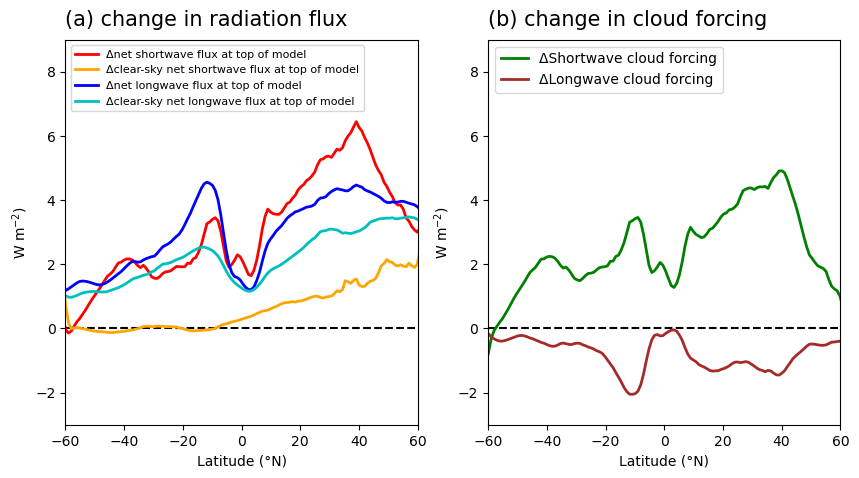

In [7]:
plt.figure(figsize=(10,5))
#panel a
plt.subplot(121)
plt.title('(a) change in radiation flux',loc='left',pad=10,fontsize=15)
plt.xlim([-60,60])
plt.axhline(y=0,color='k',ls='dashed')
plt.ylim([-3,9])
plt.plot(f.lat,f.fsnt,c='red',lw=2,ls='solid',label='%snet shortwave flux at top of model'%chr(916))
plt.plot(f.lat,f.fsntc,c='orange',ls='solid',lw=2,label='%sclear-sky net shortwave flux at top of model'%chr(916))
plt.plot(f.lat,f.flnt,c='blue',lw=2,label='%snet longwave flux at top of model'%chr(916))
plt.plot(f.lat,f.flntc,c='c',ls='solid',lw=2,label='%sclear-sky net longwave flux at top of model'%chr(916))
plt.legend(loc='upper left',fontsize=8)
plt.ylabel('W m$^{-2}$) ',fontsize=10 )
plt.xlabel('Latitude (%sN)'%chr(176),fontsize=10)
#panel b
plt.subplot(122)
plt.title('(b) change in cloud forcing',loc='left',pad=10,fontsize=15)
plt.xlim([-60,60])
plt.axhline(y=0,color='k',ls='dashed')
plt.ylim([-3,9])
plt.plot(f.lat,f.swcf,c='green',lw=2,label='%sShortwave cloud forcing'%chr(916))
plt.plot(f.lat,f.lwcf,c='brown',lw=2,label='%sLongwave cloud forcing'%chr(916))
plt.legend(loc='upper left')
plt.ylabel('W m$^{-2}$) ',fontsize=10 )
plt.xlabel('Latitude (%sN)'%chr(176),fontsize=10)


### Figure 4: change in (a) aerosol optical depth 550 nm and (b) cloud condensation neucli concentration as supersaturation 0.1% in /cm3 after the remocal of emissions

In [8]:
# Load simulated variables 
# used variables:
#     aodvis: aerosol optical depth 550nm
#     ccn: cloud condensatino neucli concentration at S 0.1% in /cm3
# open files
f = xr.open_dataset('data/fig_04.nc',decode_times=False) # Load 
LON = f.lon # Longitude
LAT = f.lat #Latitude
LEV = f.lev #vertical levels in hPa
aodvis = f.aodvis
ccn = f.ccn

/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Attempting to set identical bottom == top == 10.0 results in singular transformations; automatically expanding.


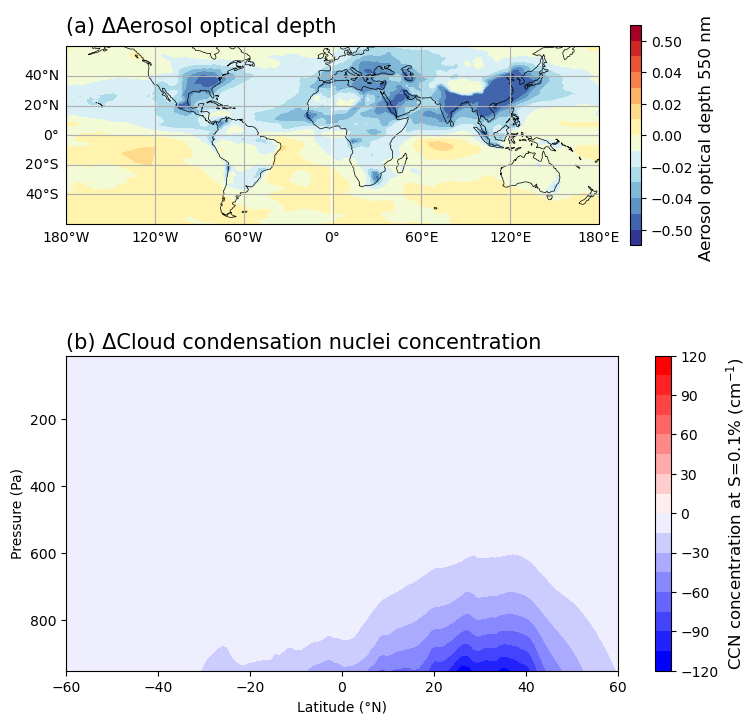

In [9]:
# colors
cmap1=plt.get_cmap('RdYlBu_r')
bounds1 = [-2.1,-0.5,-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05,0.5,2.1]
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
cmap2=plt.get_cmap('bwr')
bounds2= np.arange(-120,121,15)
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)

#Figure
fig = plt.figure(figsize=(8,9))
#panel a: aodvis
ax1 = fig.add_subplot(211,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax1.set_title('(a) %sAerosol optical depth'%chr(916),fontsize=15,loc='left',pad=10)
ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.gridlines()
ax1.set_ylim([-60,60])
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
fig1=ax1.contourf(LON, LAT, aodvis,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in [ax1]],location='right',pad=0.05,shrink=0.7,fraction=0.09)
cb1=plt.colorbar(fig1, cax=cax1, **kw1,extend='both')
cb1.ax.tick_params(labelsize=10)
cb1label='Aerosol optical depth 550 nm ' 
cb1.set_label(cb1label,fontsize=12)
# panel b: ccn
ax2=fig.add_subplot(212)
ax2.set_title("(b) %sCloud condensation nuclei concentration"%chr(916),fontsize=15,loc='left',pad=5)
fig2=ax2.contourf( LAT,LEV, ccn,levels=bounds2, cmap=cmap2,norm=norm2)
ax2.set_xlabel('Latitude (%sN)'%chr(176),fontsize=10)
ax2.set_ylabel('Pressure (Pa)',fontsize=10 )
ax2.set_ylim(top=10.)
ax2.set_ylim(bottom=950.)
ax2.set_xlim([-60,60])
cax2,kw2 = matplotlib.colorbar.make_axes([ax for ax in [ax2]],location='right',pad=0.06,fraction=0.05)
cb2=plt.colorbar(fig2, cax=cax2, **kw2,extend='both')
cb2.ax.tick_params(labelsize=10)
cb2label="CCN concentration at S=0.1% (cm$^{-1}$)"
cb2.set_label(cb2label,fontsize=12)



### Figure 5: Annual, DJF and JJA mean surface temperature change in (a,c.e) and precipitation chge in mm/day (b,d,f) after remocal of anthropogenic emissions.

In [4]:
# Load simulated variables 
# used variables:
#     ts_ann: annual mean surface temperature change in deg_C
#     ts_djf: DJF mean surface temperature change in deg_C
#     ts_jja: JJA mean surface temperature change in deg_C
#     pr_ann: annual mean precipitation change in mm/day
#     pr_djf: DJF mean precipitation change in mm/day
#     pr_jja: JJA mean precipitation change in mm/day

# open files
f = xr.open_dataset('data/fig_05.nc',decode_times=False) # Load 
LON = f.lon # Longitude
LAT = f.lat # Latitude
ts_ann = f.ts_ann
ts_ann, ts_ann_lon = add_cyclic_point(ts_ann.values, coord=LON)
ts_djf = f.ts_djf
ts_djf, ts_djf_lon = add_cyclic_point(ts_djf.values, coord=LON)
ts_jja = f.ts_jja
ts_jja, ts_jja_lon = add_cyclic_point(ts_jja.values, coord=LON)
pr_ann = f.pr_ann
pr_ann, pr_ann_lon = add_cyclic_point(pr_ann.values, coord=LON)
pr_djf = f.pr_djf
pr_djf, pr_djf_lon = add_cyclic_point(pr_djf.values, coord=LON)
pr_jja = f.pr_jja
pr_jja, pr_jja_lon = add_cyclic_point(pr_jja.values, coord=LON)

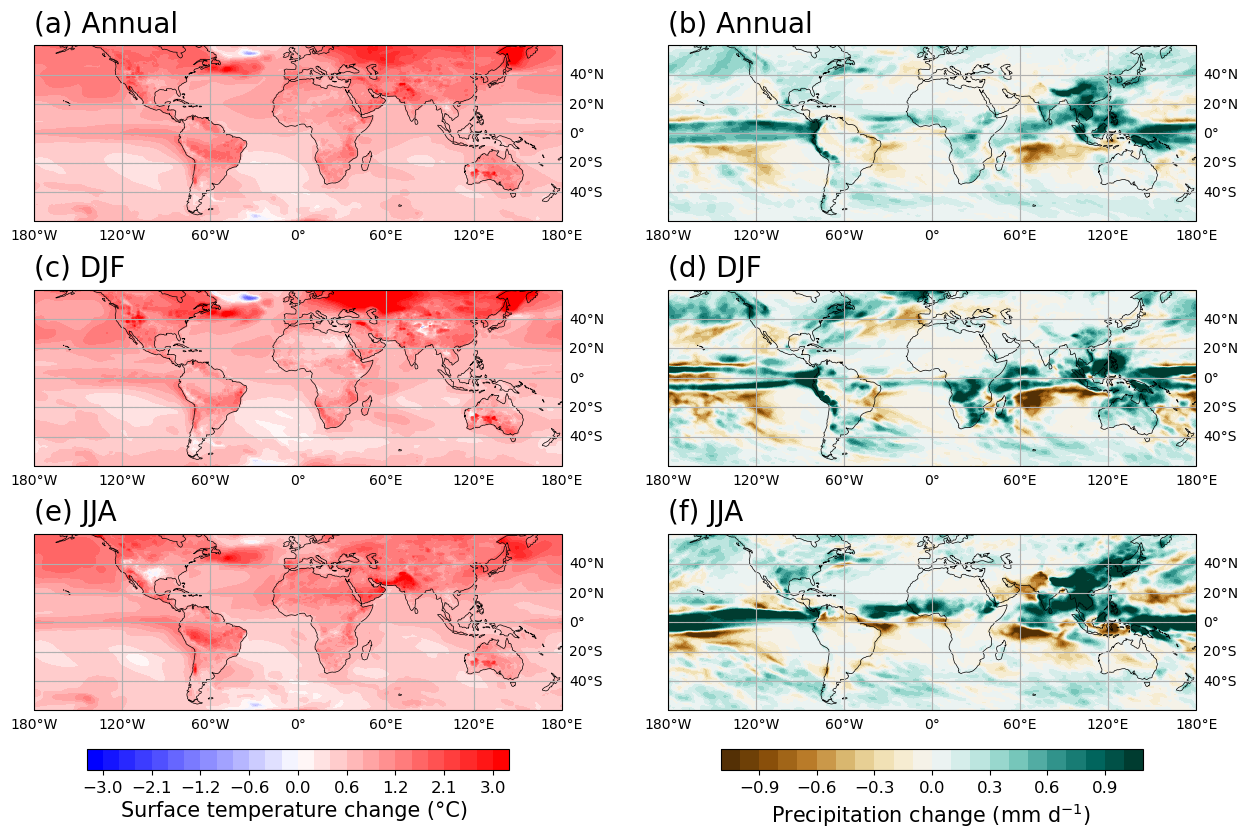

In [6]:
cmap1=plt.get_cmap('bwr')
bounds1 = [-15,-3,-2.7,-2.4,-2.1,-1.8,-1.5,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2,1.5,1.8,2.1,2.4,2.7,3,15]
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)

cmap2=plt.get_cmap('BrBG')
bounds2=[-33,-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,33]
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)


fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0.0, globe=None)})
ax1=axs[0][0]
ax2=axs[1][0]
ax3=axs[2][0]
ax4=axs[0][1]
ax5=axs[1][1]
ax6=axs[2][1]
# annual temperature change
ax1.set_title('(a) Annual',fontsize=20,loc='left',pad=10)
ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.gridlines()
ax1.set_ylim([-60,60])
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl1.xlabels_top = False
gl1.ylabels_left = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
fig1 = ax1.contourf(ts_ann_lon,LAT,ts_ann,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
# DJF temperature change
ax2.set_title('(c) DJF ',fontsize=20,loc='left',pad=10)
ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.gridlines()
ax2.set_ylim([-60,60])
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl2.xlabels_top = False
gl2.ylabels_left = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
fig2 = ax2.contourf(ts_djf_lon,LAT,ts_djf,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
# JJA temperature change
ax3.set_title('(e) JJA ',fontsize=20,loc='left',pad=10)
ax3.coastlines(resolution='110m', linewidth=0.5)
ax3.gridlines()
ax3.set_ylim([-60,60])
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl3.xlabels_top = False
gl3.ylabels_left = False
#gl2.ylocator = mticker.FixedLocator([-30, 0, 30, 60])
gl3.xformatter = LONGITUDE_FORMATTER
gl3.yformatter = LATITUDE_FORMATTER
fig3 = ax3.contourf(ts_jja_lon,LAT,ts_jja,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
# annual precipitation change
ax4.set_title('(b) Annual',fontsize=20,loc='left',pad=10)
ax4.coastlines(resolution='110m', linewidth=0.5)
ax4.gridlines()
ax4.set_ylim([-60,60])
gl4 = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl4.xlabels_top = False
gl4.ylabels_left = False
gl4.xformatter = LONGITUDE_FORMATTER
gl4.yformatter = LATITUDE_FORMATTER
fig4 = ax4.contourf(pr_ann_lon,LAT,pr_ann,levels=bounds2, transform=ccrs.PlateCarree(),cmap=cmap2,norm=norm2)
# DJF precipitation change
ax5.set_title('(d) DJF ',fontsize=20,loc='left',pad=10)
ax5.coastlines(resolution='110m', linewidth=0.5)
ax5.gridlines()
gl5 = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl5.xlabels_top = False
gl5.ylabels_left = False
ax5.set_ylim([-60,60])
gl5.xformatter = LONGITUDE_FORMATTER
gl5.yformatter = LATITUDE_FORMATTER
fig5 = ax5.contourf(pr_djf_lon,LAT,pr_djf,levels=bounds2, transform=ccrs.PlateCarree(),cmap=cmap2,norm=norm2)
# JJA precipitation change
ax6.set_title('(f) JJA ',fontsize=20,loc='left',pad=10)
ax6.coastlines(resolution='110m', linewidth=0.5)
ax6.gridlines()
ax6.set_ylim([-60,60])
gl6 = ax6.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl6.xlabels_top = False
gl6.ylabels_left = False
gl6.xformatter = LONGITUDE_FORMATTER
gl6.yformatter = LATITUDE_FORMATTER
fig6 = ax6.contourf(pr_jja_lon,LAT,pr_jja,levels=bounds2, transform=ccrs.PlateCarree(),cmap=cmap2,norm=norm2)

cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in [ax1,ax2,ax3]],location='bottom',pad=0.05,shrink=0.8,fraction=0.05)
cb1=plt.colorbar(fig2, cax=cax1, **kw1,extend='both')
cb1.ax.tick_params(labelsize=12)
cb1label='Surface temperature change (%sC) ' %chr(176)
cb1.set_label(cb1label,fontsize=15)

cax2,kw2 = matplotlib.colorbar.make_axes([ax for ax in [ax4,ax5,ax6]],location='bottom',pad=0.05,shrink=0.8,fraction=0.05)
cb2=plt.colorbar(fig4, cax=cax2, **kw2,extend='both')
cb2.ax.tick_params(labelsize=12)
cb2label='Precipitation change (mm d$^{-1}$) '
cb2.set_label(cb2label,fontsize=15)

### Figure 6: Zonal averaged fraction change in high-, mid- and low- level clouds after removal of anthropogenic emissions.

In [9]:
# load simulated variables
# used variables:
#      totcloud: total cloud fraction
#      lowcloud: low-level cloud fraction
#      medcloud: med-level cloud fraction
#      highcloud: high-level cloud fraction

f = pd.read_csv('data/fig_06.csv',skipinitialspace=True,header=4)


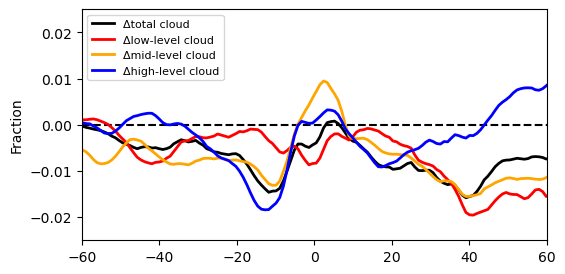

In [17]:
plt.figure(figsize=(6,3))
plt.xlim([-60,60])
plt.axhline(y=0,color='k',ls='dashed')
plt.ylim([-0.025,0.025])
plt.plot(f.lat,f.totcloud,c='k',lw=2,label='%stotal cloud'%chr(916))
plt.plot(f.lat,f.lowcloud,c='red',lw=2,label='%slow-level cloud'%chr(916))
plt.plot(f.lat,f.medcloud,c='orange',ls='solid',lw=2,label='%smid-level cloud'%chr(916))
plt.plot(f.lat,f.highcloud,c='blue',lw=2,label='%shigh-level cloud'%chr(916))

plt.legend(loc='upper left',fontsize=8)

plt.ylabel('Fraction',fontsize=10 )


### Figure 7: change in monsoon summer rain rate in mm/day during the mPWP and bu removing anthropogenic emissions

In [29]:
# Load simulated variables
# used variables:
#     monsoon_summer_rain_rate_pristine_minus_pi: change in monsoon summer rain rate during the mPWP in mm/day
#     monsoon_summer_rain_rate_pristine_minus_polluted: change in monsoon summer rain rate after removing emissions in mm/day   
#     gmd_pi: boundary of global monsoon domian in PI
#     gmd_plio_pristine: boundary of global monsoon domian in Plio_Pristine
#     gmd_plio_polluted: boundary of global monsoon domian in Plio_Polluted
# open file
f = xr.open_dataset('data/fig_07.nc',decode_times=False) # Load 
LON = f.lon # Longitude
LAT = f.lat # Latitude
spristine_pi = f.monsoon_summer_rain_rate_pristine_minus_pi
spristine_pi, spristine_pi_lon = add_cyclic_point(spristine_pi.values, coord=LON)
spristine_polluted = f.monsoon_summer_rain_rate_pristine_minus_polluted
spristine_polluted, spristine_polluted_lon = add_cyclic_point(spristine_polluted.values, coord=LON)
gmd_pi = f.gmd_pi
gmd_pi, gmd_pi_lon = add_cyclic_point(gmd_pi.values, coord=LON)
gmd_plio_pristine = f.gmd_plio_pristine
gmd_plio_pristine, gmd_plio_pristine_lon = add_cyclic_point(gmd_plio_pristine.values, coord=LON)
gmd_plio_polluted = f.gmd_plio_polluted
gmd_plio_polluted, gmd_plio_polluted_lon = add_cyclic_point(gmd_plio_polluted.values, coord=LON)

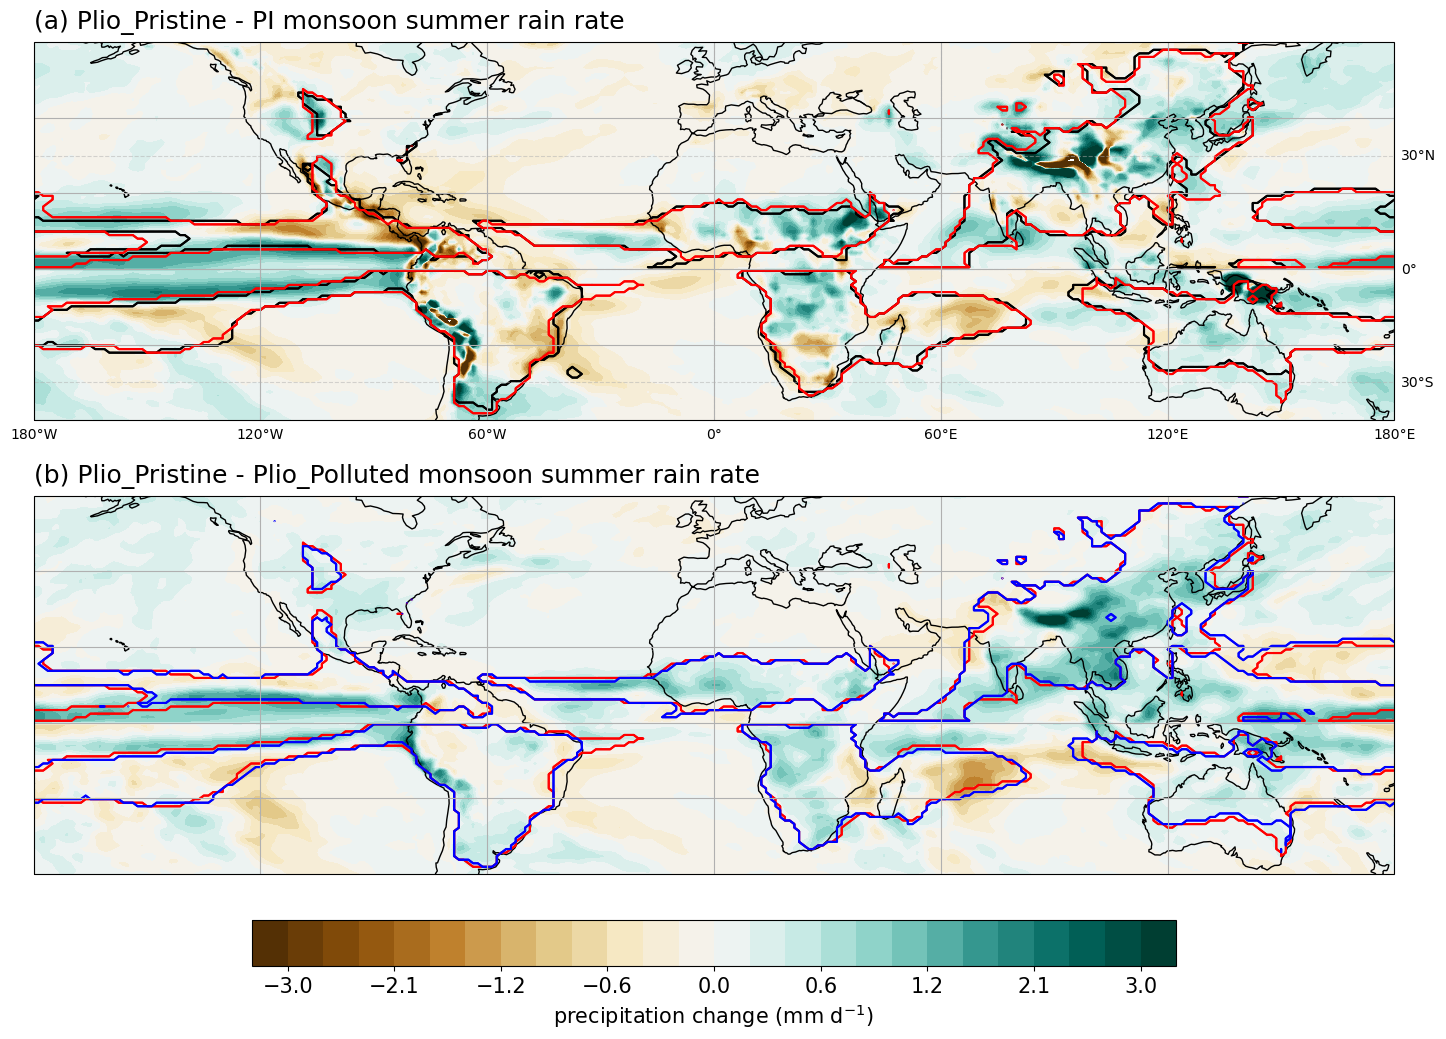

In [31]:
cmap1=plt.get_cmap('BrBG')
bounds2=[-33,-1,-0.8,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1,33]
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(18,12),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0.0, globe=None)})
ax1=axs[0]
ax2=axs[1]

ax1.set_title('(a) Plio_Pristine - PI monsoon summer rain rate',pad=10,loc='left',fontsize=18)
ax1.set_ylim([-40,60])
ax1.coastlines()
ax1.gridlines()
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl1.xlabels_top = False
gl1.ylabels_left = False
gl1.ylocator = mticker.FixedLocator([-30, 0, 30, 60])
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
fig1=ax1.contourf(spristine_pi_lon,LAT,spristine_pi,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
ax1.contour(gmd_pi_lon,LAT,gmd_pi, levels=[100,110], colors='k', linestyles='-')
ax1.contour(gmd_plio_pristine_lon,LAT,gmd_plio_pristine, levels=[100,110], colors='r', linestyles='-')

ax2.set_title('(b) Plio_Pristine - Plio_Polluted monsoon summer rain rate',pad=10,loc='left',fontsize=18)
ax2.set_ylim([-40,60])
ax2.coastlines()
ax2.gridlines()
gl2 = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl2.xlabels_top = False
gl2.ylabels_left = False
gl2.ylocator = mticker.FixedLocator([-30, 0, 30, 60])
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
fig2=ax2.contourf(spristine_polluted_lon,LAT,spristine_polluted,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
ax2.contour(gmd_plio_pristine_lon,LAT,gmd_plio_pristine, levels=[100,110], colors='r', linestyles='-')
ax2.contour(gmd_plio_polluted_lon,LAT,gmd_plio_polluted, levels=[100,110], colors='b', linestyles='-')

cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in axs.flat],location='bottom',pad=0.05,shrink=0.7,fraction=0.05)
cb1=plt.colorbar(fig1, cax=cax1, **kw1,extend='both')
cb1.ax.tick_params(labelsize=15)
cb1label='precipitation change (mm d$^{-1}$) '
cb1.set_label(cb1label,fontsize=15)


### Figure 8: zonal averaged change in (a) cloud droplet concentration and (b) cloud liquid path

In [18]:
# load simulated variables
# used variables:
#      cdnumc: cloud droplet concentration in /m2
#      tgcldlwp: cloud liquid water path in kg/m2
f = pd.read_csv('data/fig_08.csv',skipinitialspace=True,header=2)

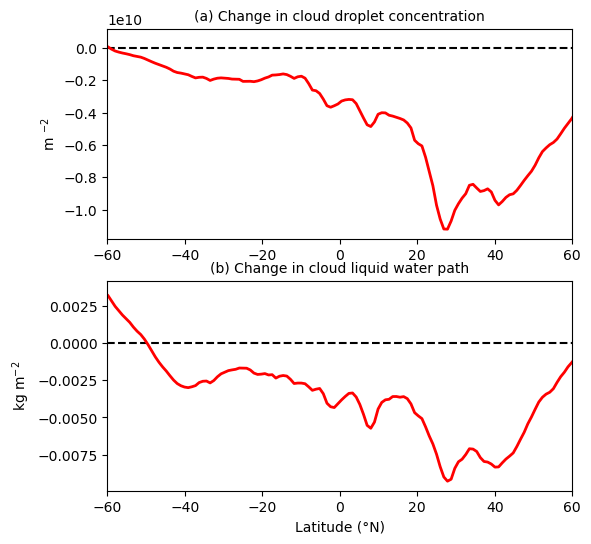

In [25]:
plt.figure(figsize=(6,6))
plt.subplot(211)
plt.title('(a) Change in cloud droplet concentration',loc='center',fontsize=10)
plt.xlim([-60,60])
plt.axhline(y=0,color='k',ls='dashed')
plt.plot(f.lat,f.cdnumc,c='red',lw=2)
plt.ylabel('m $^{-2}$',fontsize=10 )
plt.subplot(212)
plt.title('(b) Change in cloud liquid water path',loc='center',fontsize=10)
plt.xlim([-60,60])
plt.axhline(y=0,color='k',ls='dashed')

plt.plot(f.lat,f.tgcldlwp,c='red',lw=2)
plt.ylabel('kg m$^{-2}$',fontsize=10 )
plt.xlabel('Latitude (%sN)'%chr(176),fontsize=10)


### Figure 9: change in annual and seasonal sea level pressure (hPa) and surface winds

In [2]:
# Load simulated variables 
# used variables: <variable>_<season>_<experiment>
#     <variable>: psl: sea level pressure in hPa
#                 u: zonal wind in m/s
#                 v: meridional wind in m/s
#     <season>: ann: Annual
#               djf: DJF
#               jja: JJA
#     <experiment>: pristine: Plio_Pristine
#               Plio_Polluted
#               pi: PI 
# open file
f = xr.open_dataset('data/fig_09.nc',decode_times=False) # Load 
LON = f.lon # Longitude
LAT = f.lat # Latitude


In [3]:
# define a function to compute and plot sea level pressure and surface winds change
def plot_psl(ax,title,season,expt1,expt2):
    psl = f['psl_%s_%s'%(season,expt1)] - f['psl_%s_%s'%(season,expt2)]
    psl,psl_lon = add_cyclic_point(psl.values, coord=LON)
    u = f['u_%s_%s'%(season,expt1)] - f['u_%s_%s'%(season,expt2)]
    u,u_lon = add_cyclic_point(u.values, coord=LON)
    v = f['v_%s_%s'%(season,expt1)] - f['v_%s_%s'%(season,expt2)]
    v,v_lon = add_cyclic_point(v.values, coord=LON)
    X,Y =np.meshgrid(psl_lon,LAT)
    ax.set_title('%s'%title,pad=10,loc='left',fontsize=20)
    ax.coastlines()
    ax.gridlines()
    gl1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
    gl1.xlabels_top = False
    gl1.ylabels_left = False
    gl1.xformatter = LONGITUDE_FORMATTER
    gl1.yformatter = LATITUDE_FORMATTER
    fig1=ax.contourf(psl_lon,LAT,psl,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
    q1 = ax.quiver(X[::10,::10], Y[::10,::10], u[::10,::10], v[::10,::10],pivot='mid')
    return fig1,q1


/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


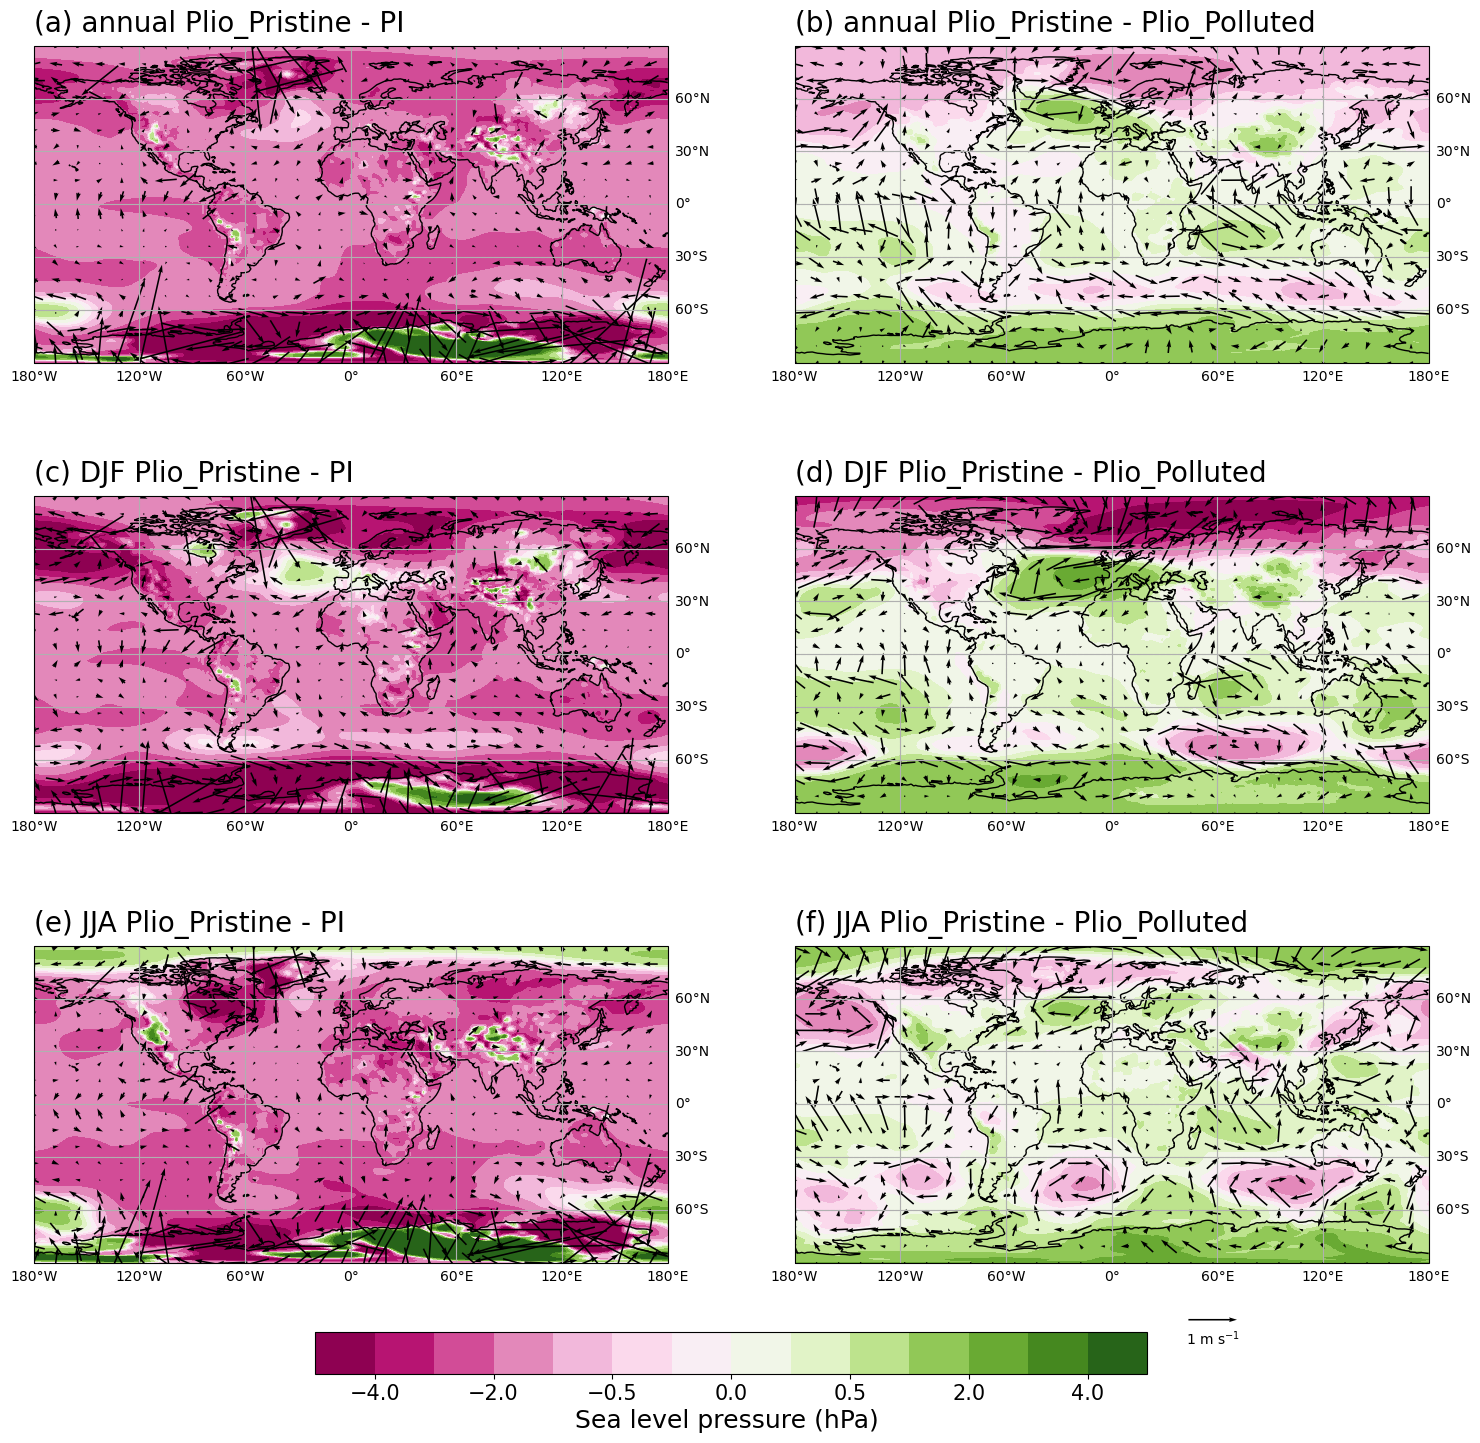

In [4]:
cmap1=plt.get_cmap('PiYG')
bounds1 = [-60,-4,-3,-2,-1,-0.5,-0.25,0,0.25,0.5,1,2,3,4,60]
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)


fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(18,18),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0.0, globe=None)})
ax10=axs[0][0]
ax20=axs[1][0]
ax30=axs[2][0]
ax11=axs[0][1]
ax21=axs[1][1]
ax31=axs[2][1]

fig10,q10=plot_psl(ax10,'(a) annual Plio_Pristine - PI','ann','pristine','pi')
fig11,q11=plot_psl(ax11,'(b) annual Plio_Pristine - Plio_Polluted','ann','pristine','polluted')
fig20,q20=plot_psl(ax20,'(c) DJF Plio_Pristine - PI','djf','pristine','pi')
fig21,q21=plot_psl(ax21,'(d) DJF Plio_Pristine - Plio_Polluted','djf','pristine','polluted')
fig30,q30=plot_psl(ax30,'(e) JJA Plio_Pristine - PI','jja','pristine','pi')
fig31,q31=plot_psl(ax31,'(f) JJA Plio_Pristine - Plio_Polluted','jja','pristine','polluted')

# add wind legend
ax31.quiverkey(q31, 0.78, 0.14, 1, r'1 m s$^{-1}$', labelpos='S',
                   coordinates='figure')

cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in axs.flat],location='bottom',pad=0.05,shrink=0.7,fraction=0.03)
cb1=plt.colorbar(fig31, cax=cax1, **kw1,extend='both')
cb1.ax.tick_params(labelsize=15)
cb1label='Sea level pressure (hPa) '
cb1.set_label(cb1label,fontsize=18)



### Figure 10: relative importance of removing anthropogenic aerosols and mPWP boundary conditions on mPWP zonal mean precipitation change

In [34]:
# load simulated variables
# used variables:
#      relative_pr_ann: ratio of change in annual mean precipitation as (Plio_Prisitne - PI)/(Plio_Pristine - Plio_Polluted)
#      relative_pr_djf: ratio of change in DJF mean precipitation as (Plio_Prisitne - PI)/(Plio_Pristine - Plio_Polluted)
#      relative_pr_jja: ratio of change in JJA mean precipitation as (Plio_Prisitne - PI)/(Plio_Pristine - Plio_Polluted)
#      aerosol_pr_ann: change in annual mean precipitation in mm/day as (Plio_Pristine - Plio_Polluted)
#      aerosol_pr_djf: change in DJF mean precipitation in mm/day as (Plio_Pristine - Plio_Polluted)
#      aerosol_pr_jja: change in JJA mean precipitation in mm/day as (Plio_Pristine - Plio_Polluted)
#      bc_pr_ann: change in annual mean precipitation in mm/day as (Plio_Pristine - PI)
#      bc_pr_djf: change in DJF mean precipitation in mm/day as (Plio_Pristine - PI)
#      bc_pr_jja: change in JJA mean precipitation in mm/day as (Plio_Pristine - PI)

f = pd.read_csv('data/fig_10.csv',skipinitialspace=True,header=9)

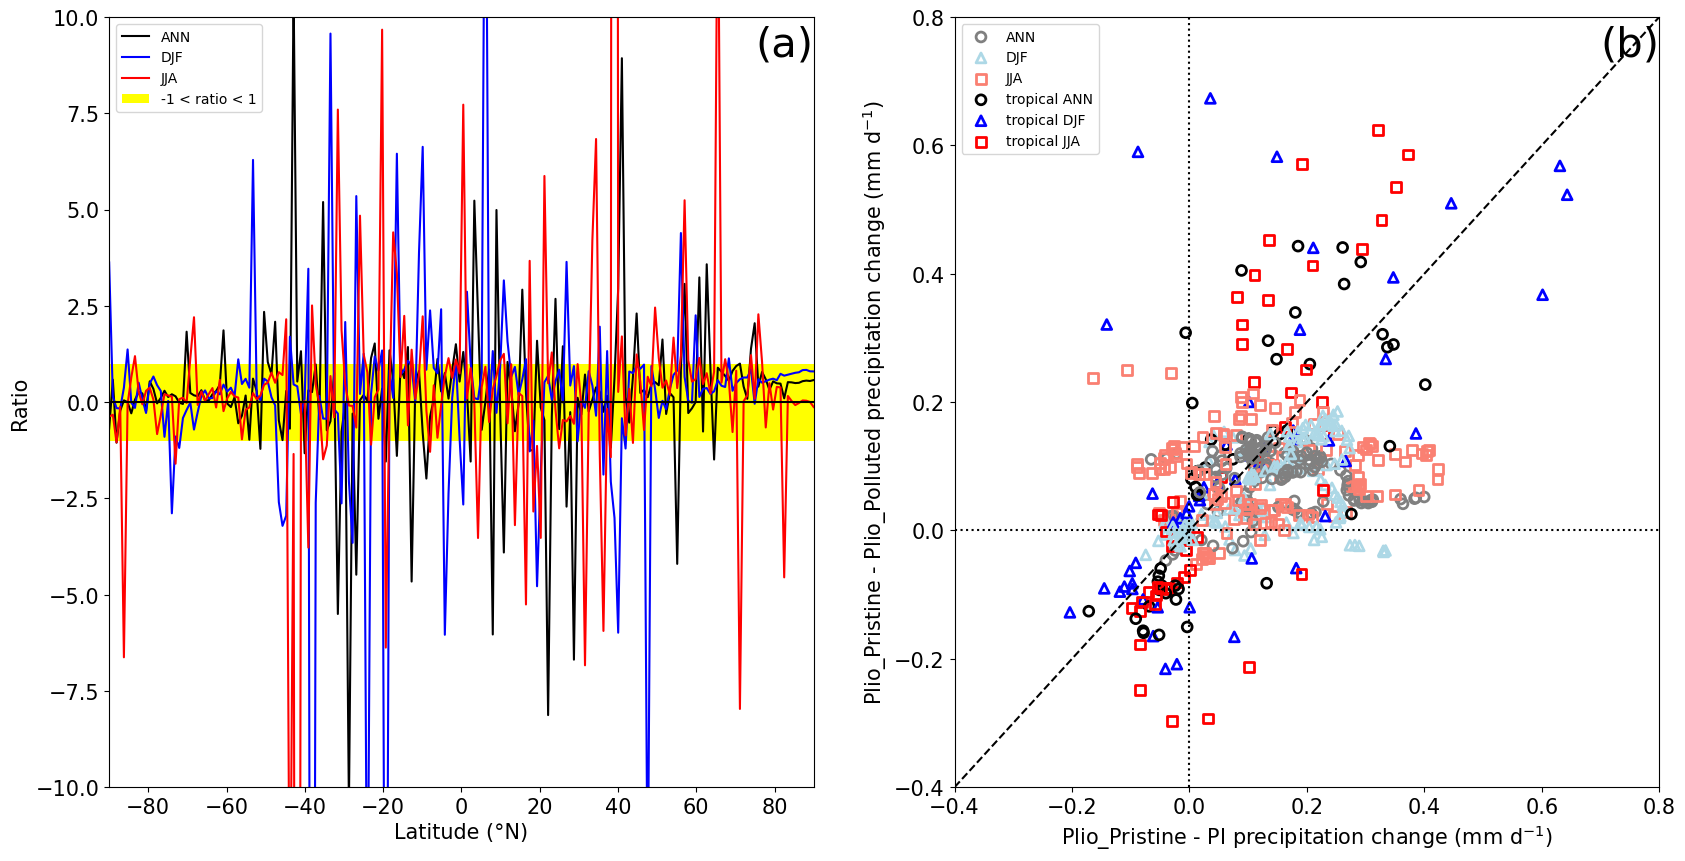

In [37]:
plt.figure(figsize=(20,10))
# panel a
plt.subplot(121)
plt.xlim([-90,90])
plt.ylim([-10,10])
plt.text(75,9,'(a)',fontsize=30)
plt.plot(f.lat,f.relative_pr_ann,color='k',label='ANN')
plt.plot(f.lat,f.relative_pr_djf,color='b',label='DJF')
plt.plot(f.lat,f.relative_pr_jja,color='r',label='JJA')
plt.axhline(y=0,color='k')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
# mark the region where the ratio falls with the range of -1 to 1
plt.fill_between(f.lat,-1,1 ,facecolor='yellow',label="-1 < ratio < 1")
plt.legend()
plt.xlabel('Latitude (%sN)'%chr(176),fontsize=15)
plt.ylabel('Ratio',fontsize=15 )
# panel b
plt.subplot(122)
plt.xlim([-0.4,0.8])
plt.ylim([-0.4,0.8])
plt.text(0.7,0.74,'(b)',fontsize=30)
# distinguish tropical data
for n,i in enumerate(f.lat):# 
    if i < -23.5:
        plt.scatter(f.bc_pr_ann[n],f.aerosol_pr_ann[n],color='none',marker='o',s=50,edgecolors='grey',lw=2)
        plt.scatter(f.bc_pr_jja[n],f.aerosol_pr_jja[n],color='none',marker='s',s=50,edgecolors='salmon',lw=2)
        plt.scatter(f.bc_pr_djf[n],f.aerosol_pr_djf[n],color='none',marker='^',s=50,edgecolors='lightblue',lw=2)
    if i >= 23.5:
        plt.scatter(f.bc_pr_ann[n],f.aerosol_pr_ann[n],color='none',marker='o',s=50,edgecolors='grey',lw=2)
        plt.scatter(f.bc_pr_jja[n],f.aerosol_pr_jja[n],color='none',marker='s',s=50,edgecolors='salmon',lw=2)
        plt.scatter(f.bc_pr_djf[n],f.aerosol_pr_djf[n],color='none',marker='^',s=50,edgecolors='lightblue',lw=2)
    if -23.5<= i <= 23.5:
        plt.scatter(f.bc_pr_ann[n],f.aerosol_pr_ann[n],color='none',marker='o',s=50,edgecolors='k',lw=2)
        plt.scatter(f.bc_pr_jja[n],f.aerosol_pr_jja[n],color='none',marker='s',s=50,edgecolors='r',lw=2)
        plt.scatter(f.bc_pr_djf[n],f.aerosol_pr_djf[n],color='none',marker='^',s=50,edgecolors='b',lw=2)
# set legends
plt.scatter([1],[1],color='none',marker='o',s=50,label='ANN',edgecolors='grey',lw=2)
plt.scatter([1],[1],color='none',marker='^',s=50,label='DJF',edgecolors='lightblue',lw=2)
plt.scatter([1],[1],color='none',marker='s',s=50,label='JJA',edgecolors='salmon',lw=2)
plt.scatter([1],[1],color='none',marker='o',s=50,label='tropical ANN',edgecolors='k',lw=2)
plt.scatter([1],[1],color='none',marker='^',s=50,label='tropical DJF',edgecolors='b',lw=2)
plt.scatter([1],[1],color='none',marker='s',s=50,label='tropical JJA',edgecolors='r',lw=2)
plt.axhline(y=0,color='k',ls='dotted')
plt.axvline(x=0,color='k',ls='dotted')
plt.plot([-0.4,0.8],[-0.4,0.8],c='k',ls='dashed')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.ylabel('Plio_Pristine - Plio_Polluted precipitation change (mm d$^{-1}$)',fontsize=15)
plt.xlabel('Plio_Pristine - PI precipitation change (mm d$^{-1}$)',fontsize=15 )


### Figure A1: spatial change in (a) shortwave cloud forcing and (b) longwave cloud forcing in W/m2

In [11]:
# load simulated variables
# used variables:

#      lwcf: longwave cloud forcing
#      swcf: shortwave cloud forcing
f = xr.open_dataset('data/fig_a1.nc',decode_times=False) # Load 
LON = f.lon # Longitude
LAT = f.lat # Latitude
swcf = f.swcf
swcf,swcf_lon = add_cyclic_point(swcf.values, coord=LON)
lwcf = f.lwcf
lwcf,lwcf_lon = add_cyclic_point(lwcf.values, coord=LON)

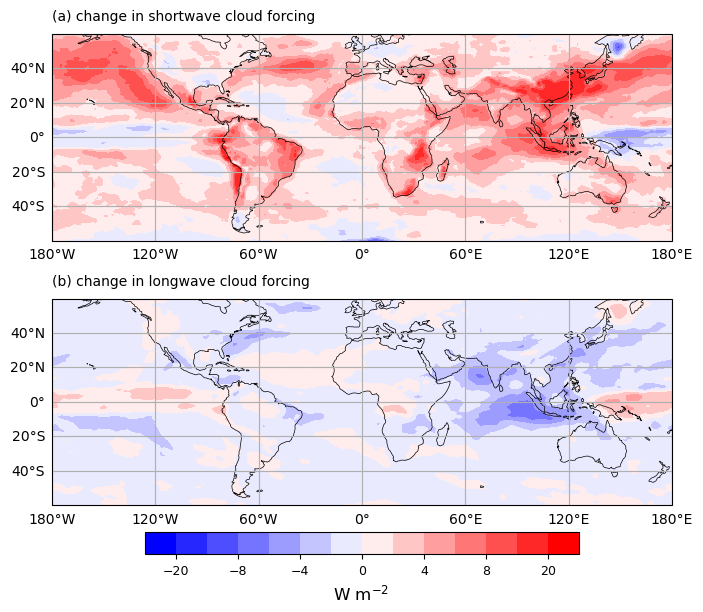

In [12]:
cmap1=plt.get_cmap('bwr')    
bounds1 =[-40,-20,-10,-8,-6,-4,-2,0,2,4,6,8,10,20,40]
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)


fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(8,7),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0.0, globe=None)})

ax1=axs[0]
ax2=axs[1]


ax1.set_title('(a) change in shortwave cloud forcing',fontsize=10,loc='left',pad=10)
ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.gridlines()
ax1.set_ylim([-60,60])
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
fig1=ax1.contourf(swcf_lon, LAT, swcf,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)

ax2.set_title('(b) change in longwave cloud forcing',fontsize=10,loc='left',pad=10)
ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.gridlines()
ax2.set_ylim([-60,60])
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
fig2=ax2.contourf(swcf_lon,LAT,lwcf,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)

cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in axs.flat],location='bottom',pad=0.05,shrink=0.7,fraction=0.05)
cb1=plt.colorbar(fig1, cax=cax1, **kw1,extend='both')
cb1.ax.tick_params(labelsize=9)
cb1label='W m$^{-2}$ ' 
cb1.set_label(cb1label,fontsize=12)
plt.savefig('figa1.png')

### Figure a2: Spatial change in clouds

In [21]:
# load simulated variables
#relative changes are computed as (Plio_Pristine - Plio_Polluted)*100/Plio_Pristine
# used variables:
#      rtotcloud: relative change in total cloud 
#      rlowcloud: relative change low-level cloud 
#      rmedcloud: relative change med-level cloud 
#      rhighcloud: relative change high-level cloud 
#.     cloudfraction: vertical change in cloud fraction
f = xr.open_dataset('data/fig_a2.nc',decode_times=False) # Load 
LON = f.lon # Longitude
LAT = f.lat # Latitude
rtotcloud = f.rtotcloud
rtotcloud, rtotcloud_lon = add_cyclic_point(rtotcloud.values, coord=LON)
rlowcloud = f.rlowcloud
rlowcloud,rlowcloud_lon = add_cyclic_point(rlowcloud.values, coord=LON)
rmedcloud = f.rmedcloud
rmedcloud, rmedcloud_lon = add_cyclic_point(rmedcloud.values, coord=LON)
rhighcloud = f.rhighcloud
rhighcloud,rhighcloud_lon = add_cyclic_point(rhighcloud.values, coord=LON)
cloud = f.cloudfraction

/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/ipykernel_launcher.py:81: UserWarning: Attempting to set identical bottom == top == 10.0 results in singular transformations; automatically expanding.


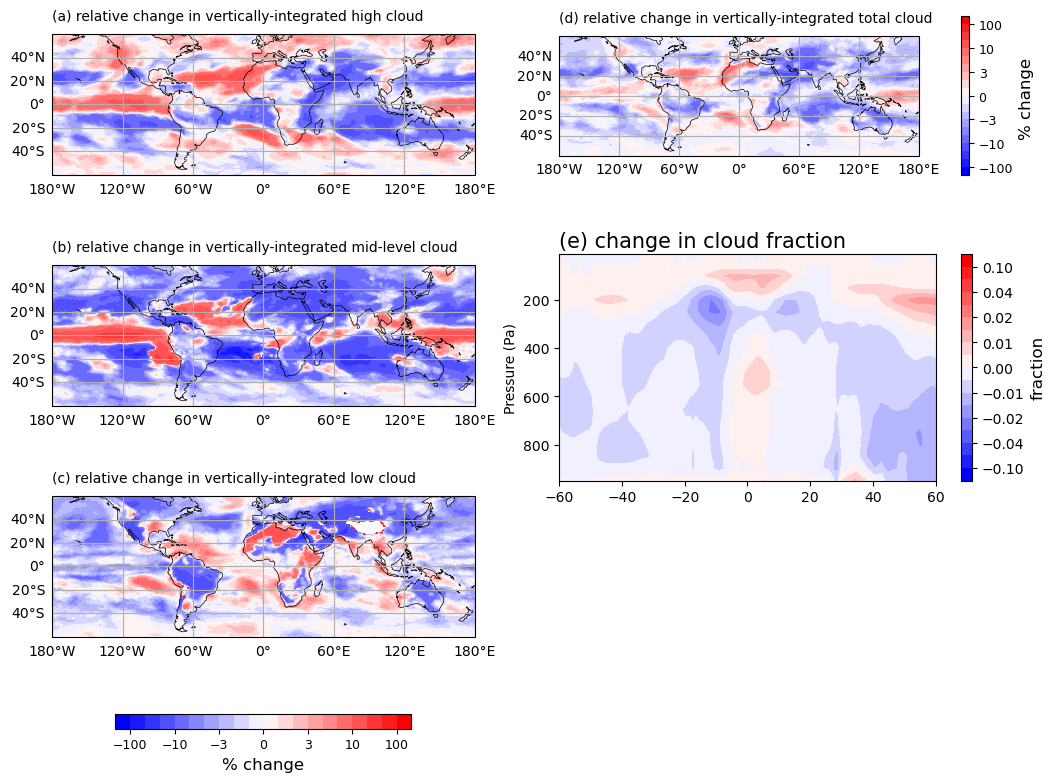

In [23]:

cmap1=plt.get_cmap('bwr')
bounds1=[-800000,-100,-50,-30,-10,-5,-4,-3,-2,-1,0,1,2,3,4,5,10,30,50,100,800000]
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)

cmap2=plt.get_cmap('bwr')
bounds2 = [-80,-0.100,-0.050,-0.040,-0.030,-0.020,-0.015,-0.010,-0.005,0,0.005,0.010,0.015,0.020,0.030,0.040,0.050,0.100,80]
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)

fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(12,10),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0.0, globe=None)})
ax1=axs[0][0]
ax2=axs[1][0]
ax3=axs[2][0]
ax21=axs[0][1]
fig.delaxes(axs[1][1])
fig.delaxes(axs[2][1])


ax1.set_title('(a) relative change in vertically-integrated high cloud',fontsize=10,loc='left',pad=10)
ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.gridlines()
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
fig1=ax1.contourf(rhighcloud_lon, LAT, rhighcloud,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
ax1.set_ylim([-60,60])


ax2.set_title('(b) relative change in vertically-integrated mid-level cloud',fontsize=10,loc='left',pad=10)
ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.gridlines()
ax2.set_ylim([-60,60])
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
fig2=ax2.contourf(rmedcloud_lon, LAT, rmedcloud,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)

ax3.set_title('(c) relative change in vertically-integrated low cloud',fontsize=10,loc='left',pad=10)
ax3.coastlines(resolution='110m', linewidth=0.5)
ax3.gridlines()
ax3.set_ylim([-60,60])
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl3.xlabels_top = False
gl3.ylabels_right = False
gl3.xformatter = LONGITUDE_FORMATTER
gl3.yformatter = LATITUDE_FORMATTER
fig3=ax3.contourf(rlowcloud_lon, LAT,rlowcloud,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)

cax3,kw3 = matplotlib.colorbar.make_axes([ax for ax in [ax1,ax2,ax3]],location='bottom',pad=0.1,shrink=0.7,fraction=0.05)
cb3=plt.colorbar(fig3, cax=cax3, **kw3,extend='both')
cb3.ax.tick_params(labelsize=9)
cb3label='% change'  
cb3.set_label(cb3label,fontsize=12)

ax21.set_title('(d) relative change in vertically-integrated total cloud',fontsize=10,loc='left',pad=10)
ax21.coastlines(resolution='110m', linewidth=0.5)
ax21.gridlines()
ax21.set_ylim([-60,60])
gl21 = ax21.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl21.xlabels_top = False
gl21.ylabels_right = False

gl21.xformatter = LONGITUDE_FORMATTER
gl21.yformatter = LATITUDE_FORMATTER
fig21=ax21.contourf(rtotcloud_lon, LAT, rtotcloud,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
cax21,kw21 = matplotlib.colorbar.make_axes([ax for ax in [ax21]],location='right',pad=0.1,shrink=0.7,fraction=0.05)
cb21=plt.colorbar(fig21, cax=cax21, **kw21,extend='both')
cb21.ax.tick_params(labelsize=9)
cb21label='% change ' 
cb21.set_label(cb21label,fontsize=12)


ax33=fig.add_subplot(324)
ax33.set_title("(e) change in cloud fraction",fontsize=15,loc='left',pad=5)
fig33=ax33.contourf( LAT,f.lev,cloud,levels=bounds2, cmap=cmap2,norm=norm2)
#ax33.set_xlabel('Latitude (%sN)'%chr(176),fontsize=10)
ax33.set_ylabel('Pressure (Pa)',fontsize=10 )
ax33.set_ylim(top=10.)
ax33.set_ylim(bottom=950.)
ax33.set_xlim([-60,60])
cax33,kw33 = matplotlib.colorbar.make_axes([ax for ax in [ax33]],location='right',pad=0.06,fraction=0.05)
cb33=plt.colorbar(fig33, cax=cax33, **kw33,extend='both')
cb33.ax.tick_params(labelsize=10)
cb33label="fraction"
cb33.set_label(cb33label,fontsize=12)

plt.savefig('figa2.png')

### Figure a3: Change in (a) vertically-integrated droplet concentration and (b) grid-box cloud liquid water path

In [2]:
# load simulated variables
# used variables:

#      cdnumc: vertically-integrated droplet concentration in /m2
#      tgcldlwp: cloud liquid water path in kg/m2
f = xr.open_dataset('data/fig_a3.nc',decode_times=False) # Load 
LON = f.lon # Longitude
LAT = f.lat # Latitude
cdnumc = f.cdnumc
cdnumc,cdnumc_lon  = add_cyclic_point(cdnumc.values, coord=LON)
tgcldlwp = f.tgcldlwp
tgcldlwp,tgcldlwp_lon = add_cyclic_point(tgcldlwp.values, coord=LON)

/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/annie/anaconda3/envs/pmip/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


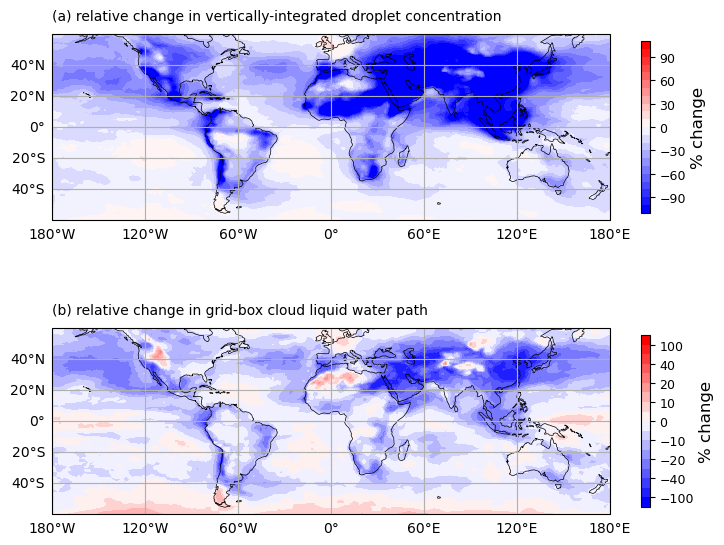

In [3]:
cmap1=plt.get_cmap('bwr')
bounds1 = [-800,-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,800]
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)

cmap2=plt.get_cmap('bwr')
bounds2=[-8000,-100,-50,-40,-30,-20,-15,-10,-5,0,5,10,15,20,30,40,50,100,8000]
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(8,7),subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0.0, globe=None)})
ax1=axs[0]
ax2=axs[1]

ax1.set_title('(a) relative change in vertically-integrated droplet concentration',fontsize=10,loc='left',pad=10)
ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.gridlines()
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
fig1=ax1.contourf(cdnumc_lon,LAT,cdnumc,levels=bounds1, transform=ccrs.PlateCarree(),cmap=cmap1,norm=norm1)
ax1.set_ylim([-60,60])
cax1,kw1 = matplotlib.colorbar.make_axes([ax for ax in [ax1]],location='right',pad=0.05,shrink=0.7,fraction=0.05)
cb1=plt.colorbar(fig1, cax=cax1, **kw1,extend='both')
cb1.ax.tick_params(labelsize=9)
cb1label='% change' 
cb1.set_label(cb1label,fontsize=12)


ax2.set_title('(b) relative change in grid-box cloud liquid water path',fontsize=10,loc='left',pad=10)
ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.gridlines()
ax2.set_ylim([-60,60])
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
fig2=ax2.contourf(tgcldlwp_lon, LAT,tgcldlwp,levels=bounds2, transform=ccrs.PlateCarree(),cmap=cmap2,norm=norm2)
cax2,kw2 = matplotlib.colorbar.make_axes([ax for ax in [ax2]],location='right',pad=0.05,shrink=0.7,fraction=0.05)
cb2=plt.colorbar(fig2, cax=cax2, **kw2,extend='both')
cb2.ax.tick_params(labelsize=9)
cb2label='% change'  
cb2.set_label(cb2label,fontsize=12)


plt.savefig('figa3.png')